# 03 - União dos Dataframes processados

### Importação das bibliotecas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Merge dos DataSets (vendas_df + store_df)

In [3]:
vendas_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/vendasOK_df.csv')

store_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/storeOK_df.csv')

In [5]:
vendas_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Observe que ambos os DataFrames (**`vendas_df` e `store_df`**) possuem o atributo `store` em comum. Assim, podemos uni-los utilizando essa coluna como chave para realizar operações de junção e acessar informações combinadas de forma integrada.

In [12]:
df_completo = pd.merge(vendas_df, store_df, how = 'inner', on='Store')
df_completo.shape
df_completo.to_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/df_completo.csv', index=False)

In [8]:
df_completo.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [9]:
df_completo.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
844391,1097,2,2013-01-01,5961,1405,0,a,1,b,b,720.0,3.0,2002.0,0,0.0,0.0,0


## Matriz de Correlação

Após a união dos datasets de vendas e lojas, é fundamental entendermos **como as diferentes variáveis numéricas se relacionam entre si**. A **matriz de correlação** é uma ferramenta estatística poderosa para essa finalidade.

**Para que serve?**
* A matriz de correlação quantifica a **relação linear** entre pares de variáveis numéricas.
* Os coeficientes de correlação variam de **-1 a +1**:
    * **+1**: Correlação linear positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).
    * **-1**: Correlação linear negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).
    * **0**: Nenhuma correlação linear entre as variáveis.
* Valores próximos de +1 ou -1 indicam uma relação linear forte, enquanto valores próximos de 0 indicam uma relação linear fraca ou inexistente.

**Como ajudará na sua análise?**
* **Identificar Multicolinearidade**: Altas correlações entre variáveis preditoras (features) podem indicar multicolinearidade, o que pode ser problemático para alguns algoritmos de Machine Learning (como regressão linear), inflando a variância dos coeficientes estimados.
* **Relação com a Variável Alvo**: Podemos observar quais variáveis têm uma correlação linear mais forte (positiva ou negativa) com as `Sales` (Vendas), o que pode dar insights iniciais sobre potenciais preditores.
* **Entendimento do Dataset**: Descobrir relações, às vezes inesperadas, entre diferentes variáveis, aprofundando o conhecimento sobre a dinâmica do negócio.
* **Seleção de Features**: Pode auxiliar na decisão de quais features manter ou remover, especialmente se houver features altamente correlacionadas que fornecem informação redundante.

Para facilitar a interpretação, a matriz de correlação é frequentemente visualizada como um **heatmap** (mapa de calor), onde as cores representam a força e a direção da correlação.

**Nota importante sobre variáveis imputadas com `0`**: Lembre-se que algumas colunas como `CompetitionOpenSinceMonth/Year` e `Promo2SinceWeek/Year` tiveram valores NaN preenchidos com `0`. Embora o `0` seja tratado como um número no cálculo da correlação, ele representa um caso especial ("não aplicável" ou "desconhecido"). As correlações envolvendo estas colunas devem ser interpretadas com cautela, pois os `0`s podem influenciar os coeficientes de maneiras que não refletem uma relação linear típica com os valores não nulos originais.

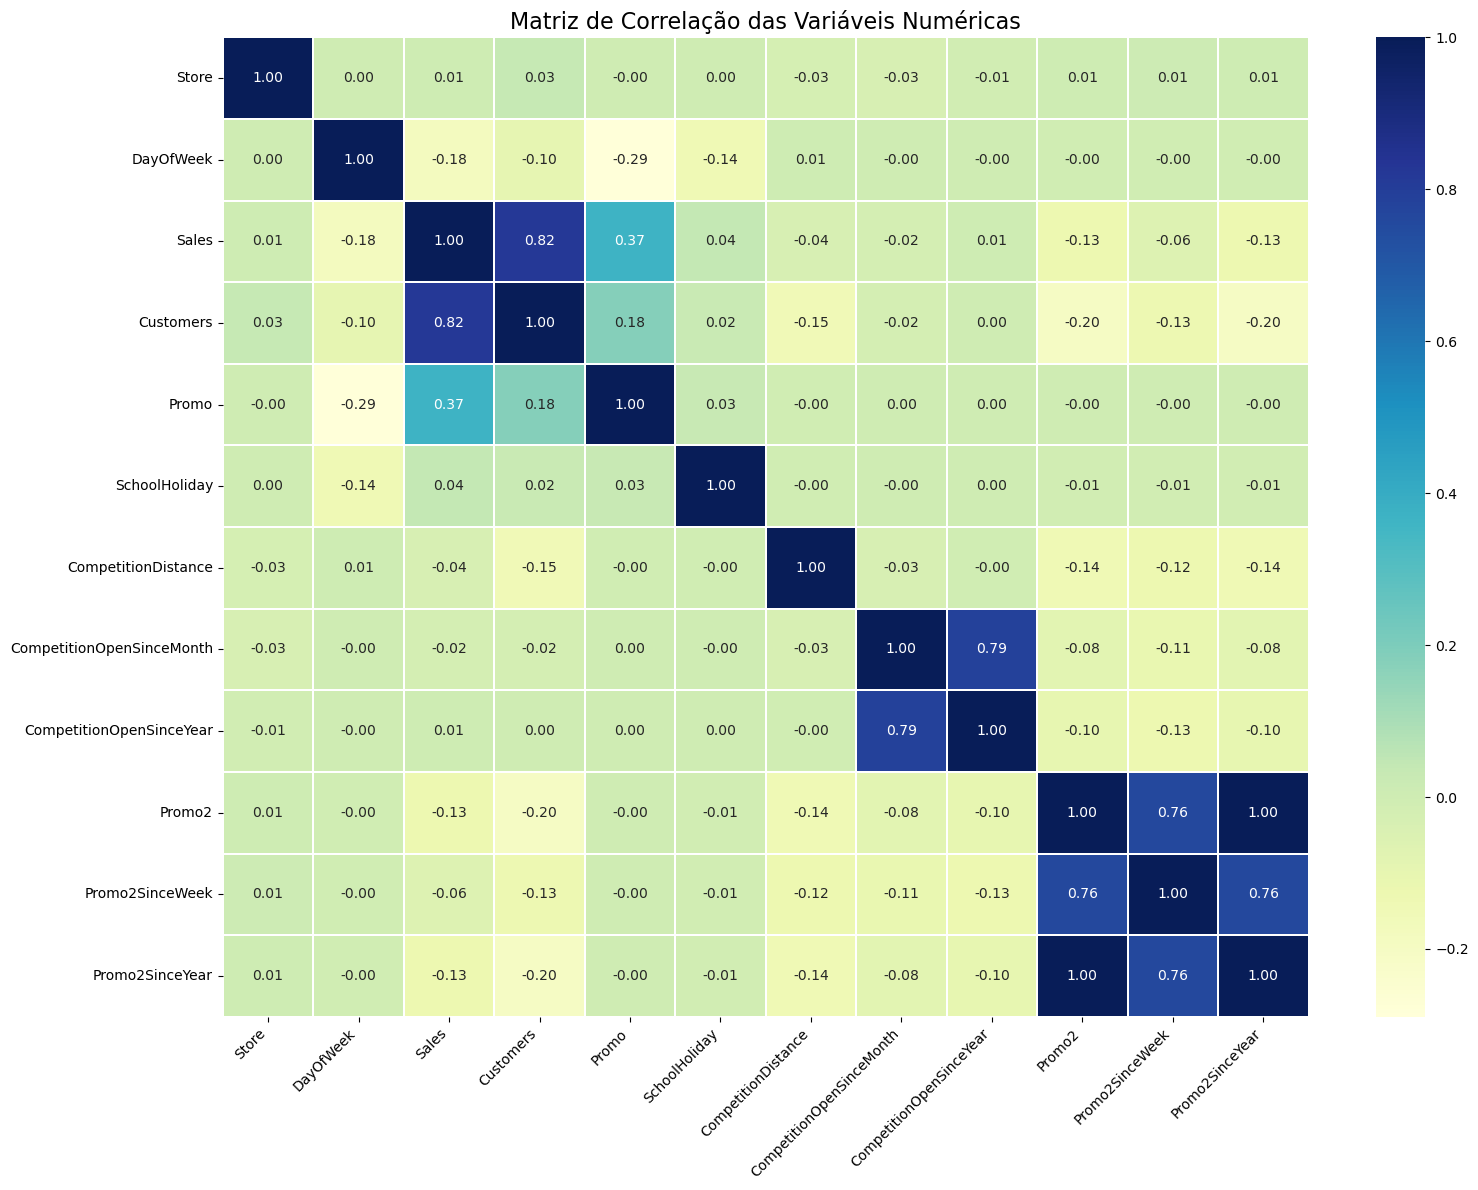

In [10]:
# 1. Selecionar apenas as colunas numéricas para o cálculo da correlação
df_numerico = df_completo.select_dtypes(include=np.number)

# 2. Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

# 3. Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(16, 12)) # Ajuste o tamanho conforme necessário
sns.heatmap(matriz_correlacao,
            annot=True,        # Mostrar os valores de correlação no mapa
            fmt=".2f",         # Formatar os valores com duas casas decimais
            cmap='YlGnBu',   # Escolher um mapa de cores (coolwarm é bom para correlações)
            linewidths=.10,     # Linhas entre as células
            cbar=True)         # Mostrar a barra de cores
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() # Ajusta o layout para evitar sobreposição

### Análise da Matriz de Correlação do `df_completo`

A matriz de correlação nos ajuda a entender as relações lineares entre as variáveis numéricas do seu conjunto de dados combinado. Vamos observar os principais pontos:

#### Relação com `Sales` (Vendas):
* **`Customers` (Clientes) e `Sales`**: Apresentam uma **correlação positiva muito forte de 0.82**.
    * **Interpretação**: Esta é a correlação mais expressiva e esperada. Indica que, em geral, um aumento no número de clientes está fortemente associado a um aumento nas vendas, e vice-versa. É uma relação direta e fundamental para o negócio.
* **`Promo` (Promoção ativa no dia) e `Sales`**: Correlação positiva moderada de **0.37**.
    * **Interpretação**: Sugere que os dias com promoção (`Promo == 1`) tendem a ter vendas mais altas. Embora não seja uma relação extremamente forte, indica um impacto positivo das promoções diárias nas vendas.
* **`DayOfWeek` (Dia da Semana) e `Sales`**: Correlação negativa fraca de **-0.18**.
    * **Interpretação**: Indica uma leve tendência de certos dias da semana (valores mais altos, como o fim de semana, lembrando que 7=domingo) terem vendas menores, ou dias no início da semana (valores menores) terem vendas ligeiramente maiores. Isso pode ser influenciado pelo fato de que o dataset já foi filtrado para lojas abertas, e os padrões de fechamento/abertura nos fins de semana podem variar.
* **`Promo2` (Promoção contínua) e `Sales`**: Correlação negativa fraca de **-0.13**.
    * **Interpretação**: Sugere que as lojas que participam da Promo2 (`Promo2 == 1`) têm, em média, vendas ligeiramente menores. Isso é um ponto interessante que pode merecer investigação mais aprofundada (ex: a Promo2 é menos eficaz? Ou é adotada por lojas com perfil de vendas diferente?).
* **`Promo2SinceYear` e `Sales`**: Correlação negativa fraca de **-0.13**.
    * **Interpretação**: Similar à `Promo2`. Dado que `Promo2SinceYear` foi preenchido com `0` quando `Promo2 == 0`, esta correlação está fortemente ligada à anterior.
* **Outras variáveis com `Sales`**: `SchoolHoliday` (0.04), `CompetitionDistance` (-0.04), `CompetitionOpenSinceMonth` (-0.02), `CompetitionOpenSinceYear` (0.01), `Store` (0.01), `Promo2SinceWeek` (-0.06) mostram correlações lineares muito fracas com `Sales`, indicando pouca influência linear direta dessas variáveis sobre as vendas quando consideradas isoladamente desta forma.

### Relação com `Customers` (Clientes):
* Além da forte correlação com `Sales` (0.82), temos:
* **`Promo` e `Customers`**: Correlação positiva fraca de **0.18**.
    * **Interpretação**: Dias com promoção também tendem a atrair um pouco mais de clientes.
* **`Promo2` e `Customers`**: Correlação negativa fraca de **-0.20**.
    * **Interpretação**: Lojas com Promo2 tendem a ter um pouco menos de clientes, similar ao observado com `Sales`.
* **`CompetitionDistance` e `Customers`**: Correlação negativa fraca de **-0.15**.
    * **Interpretação**: Há uma leve tendência de que lojas com competidores mais distantes tenham um pouco menos de clientes, ou lojas com competidores mais próximos tenham um pouco mais. Isso é contraintuitivo se um competidor próximo "rouba" clientes. Talvez competidores próximos indiquem áreas de maior movimento geral.

### Outras Correlações Notáveis e Pontos de Atenção:
* **`Promo2` e `Promo2SinceYear`**: Apresentam uma **correlação perfeita de 1.00**. Da mesma forma, `Promo2SinceYear` com `Promo2` é 1.00.
    * **Interpretação Cautelosa**: Esta correlação perfeita é um **artefato da imputação**. Como `Promo2SinceYear` foi preenchido com `0` quando `Promo2 == 0`, e possui valores de ano (ex: >2000) quando `Promo2 == 1`, a variável `Promo2` e a `Promo2SinceYear` (após imputação) se tornam perfeitamente distinguíveis em conjunto por esses zeros. Se uma é `0`, a outra também é `0` (para os casos imputados), e se `Promo2` é `1`, `Promo2SinceYear` é um ano > 0. O cálculo da correlação de Pearson interpreta essa co-ocorrência dos zeros e a separação dos não-zeros como uma relação linear perfeita.
* **`Promo2` e `Promo2SinceWeek`**: Correlação de **0.60**.
    * **Interpretação**: Relação positiva moderada, também influenciada pela imputação de `Promo2SinceWeek` com `0` quando `Promo2 == 0`.
* **`DayOfWeek` e `Promo`**: Correlação negativa de **-0.29**.
    * **Interpretação**: Sugere que as promoções (`Promo == 1`) são menos prováveis em certos dias da semana (valores mais altos de `DayOfWeek`) ou mais prováveis em outros (valores mais baixos).
* **Colunas de Data de Abertura da Competição**: `CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear` têm uma correlação positiva moderada de **0.43**. Isso é parcialmente esperado, pois meses posteriores em um ano podem se alinhar com o próprio aumento do ano, mas também é fortemente influenciado pelos muitos pares `(0,0)` resultantes da imputação. As correlações dessas duas colunas com outras variáveis são geralmente muito fracas, o que faz sentido dado que o `0` imputado não carrega um significado ordinal real de tempo para muitos registros.

### Conclusões da Análise da Matriz de Correlação:
* A relação mais forte e mais importante para o negócio é entre `Customers` e `Sales`.
* Promoções diárias (`Promo`) parecem ter um impacto positivo tanto nas vendas quanto no número de clientes.
* A `Promo2` e suas datas associadas (após imputação) mostram correlações negativas fracas com `Sales` e `Customers`, o que levanta questões sobre sua efetividade ou sobre o perfil das lojas que a utilizam. A interpretação dessas correlações, no entanto, deve ser feita com extrema cautela devido à grande quantidade de zeros imputados que representam "não aplicável" ou "ausente".
* A distância da competição (`CompetitionDistance`) tem uma correlação linear muito fraca com `Sales`, mas uma correlação negativa um pouco mais notável (ainda que fraca) com `Customers`.
* Não foram identificadas correlações extremamente altas (ex: >0.9 ou <-0.9) entre features preditoras independentes que sugerissem multicolinearidade severa imediata, exceto nos casos artefatuais da imputação (como `Promo2` e `Promo2SinceYear`).



Valores de correlação com Sales (ordenados):
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64


/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_52926/3447682064.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


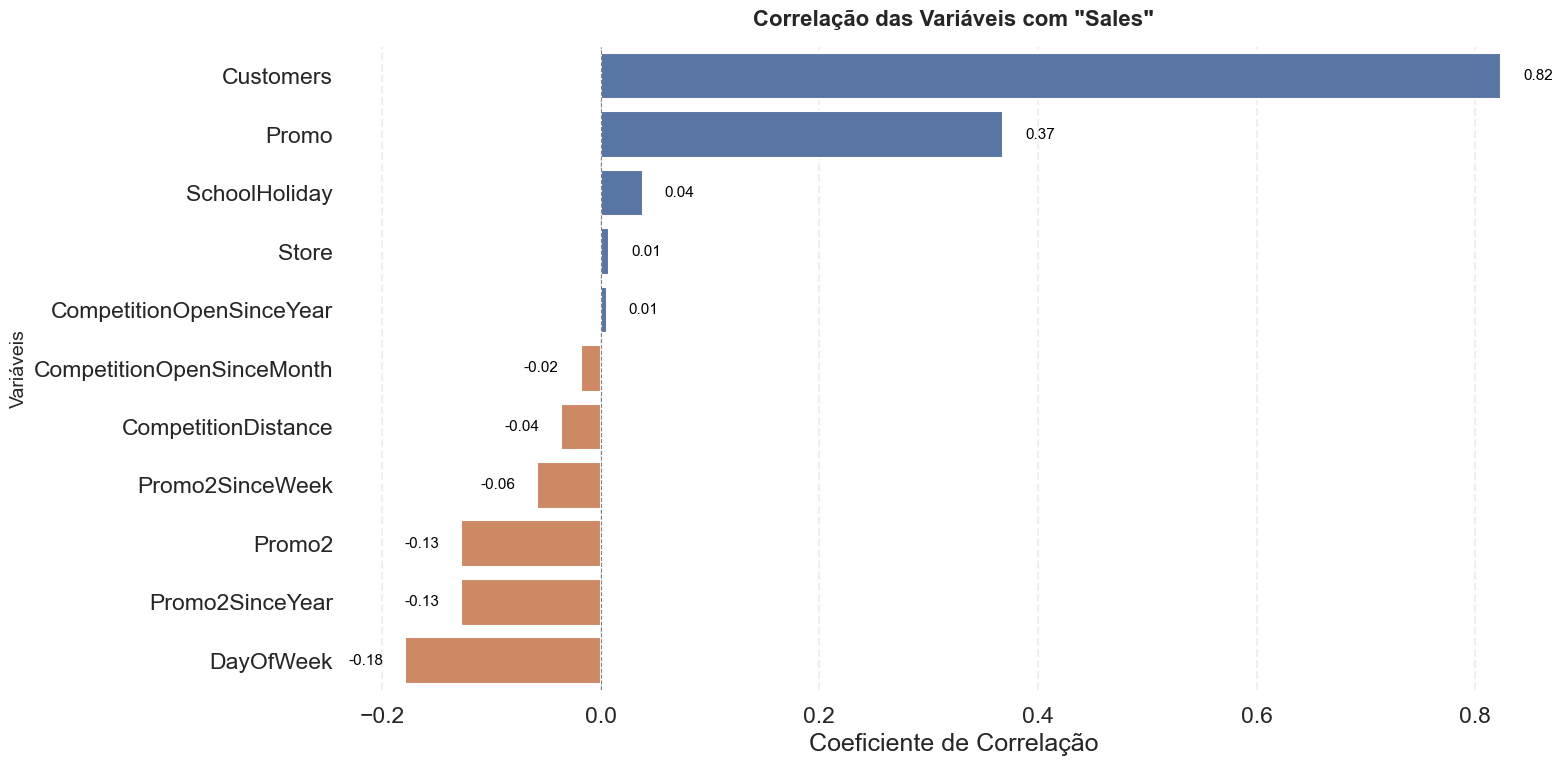

In [11]:
sns.set_style("whitegrid")
sns.set_context("talk")  # melhora fontes para apresentações

# Gerar ou carregar matriz de correlação
if 'matriz_correlacao' not in locals() and 'df_completo' in locals():
    df_numerico = df_completo.select_dtypes(include=np.number)
    matriz_correlacao = df_numerico.corr()
elif 'matriz_correlacao' not in locals():
    print("Erro: 'matriz_correlacao' ou 'df_completo' não definidos. Criando matriz dummy.")
    data_dummy = {
        'Sales': np.random.rand(100), 'Customers': np.random.rand(100),
        'Promo': np.random.randint(0, 2, 100),
        'OtherFeature': np.random.rand(100)*10
    }
    df_dummy_completo = pd.DataFrame(data_dummy)
    matriz_correlacao = df_dummy_completo.corr()

# Análise de correlação com 'Sales'
if 'Sales' in matriz_correlacao.columns:
    corr_com_sales = matriz_correlacao['Sales'].drop('Sales', errors='ignore').sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(16, 8))
    colors = ['#4C72B0' if x > 0 else '#DD8452' for x in corr_com_sales]

    bars = sns.barplot(
        x=corr_com_sales.values,
        y=corr_com_sales.index,
        palette=colors,
        orient='h'
    )

    # Título e rótulos com tipografia suave
    plt.title('Correlação das Variáveis com "Sales"', fontsize=16, weight='bold', pad=15)
    plt.xlabel('Coeficiente de Correlação', fontsize=18)
    plt.ylabel('Variáveis', fontsize=14)

    # Adiciona valores nas barras
    for bar in bars.patches:
        width = bar.get_width()
        ha = 'left' if width > 0 else 'right'
        offset = 0.02 if width > 0 else -0.02
        plt.text(
            width + offset,
            bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}',
            va='center',
            ha=ha,
            fontsize=11,
            color='black'
        )

    # Melhorias estéticas extras
    plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

    print("\nValores de correlação com Sales (ordenados):")
    print(corr_com_sales)

else:
    print("A coluna 'Sales' não foi encontrada na matriz de correlação.")
